## 딥러닝

### 심층신경망

In [70]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [71]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 전장에서 다운로드했기 때문에 다시 다운로드 하지않음

In [72]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
train_input = train_input.reshape(-1,28*28)
test_input = test_input.reshape(-1, 28*28)

In [74]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [75]:
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(100,activation='softmax')

### 심층신경망 만들기1

In [76]:
model = keras.Sequential([dense1, dense2])


In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88600 (346.09 KB)
Trainable params: 88600 (346.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 심층신경망 만들기2

In [78]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(100, activation='softmax', name='output')
], name='Fashion_MNIST_Model')


In [79]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 100)               10100     
                                                                 
Total params: 88600 (346.09 KB)
Trainable params: 88600 (346.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [81]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4826 - accuracy: 0.8369
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3495 - accuracy: 0.8758
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3155 - accuracy: 0.8869
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2918 - accuracy: 0.8951
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2738 - accuracy: 0.9009
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9078
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2441 - accuracy: 0.9121
Epoch 8/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2322 - accuracy: 0.9160
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2199 - accuracy: 0.9215
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [82]:
model.evaluate(val_scaled, val_target)
# 검증정확도 : 88%

375/375 [==============================] - 0s 902us/step - loss: 1.0784 - accuracy: 0.7951


[1.0783884525299072, 0.7950833439826965]

In [83]:
pred_result = model.predict(test_input) # gpt 한테 물어보고 추가한 코드 확실하지않을수도있음

313/313 [==============================] - 0s 850us/step


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [85]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [86]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [87]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label= class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.axis('off')
    plt.show()

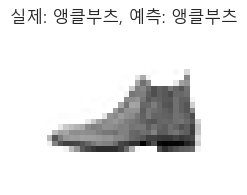

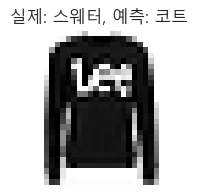

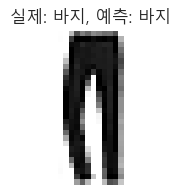

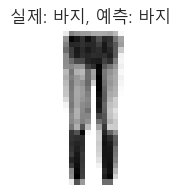

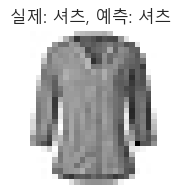

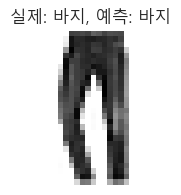

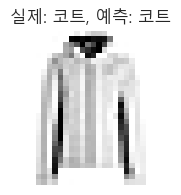

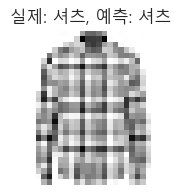

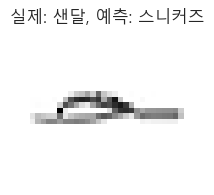

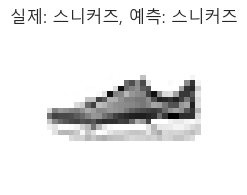

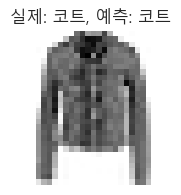

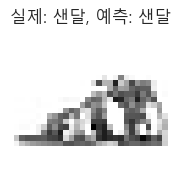

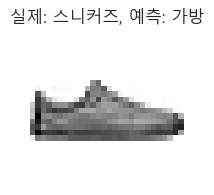

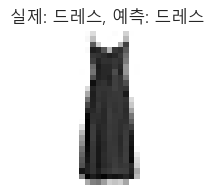

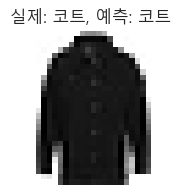

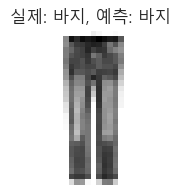

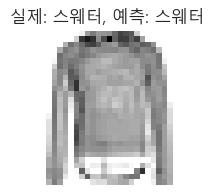

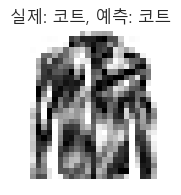

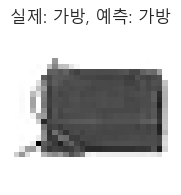

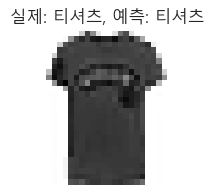

In [88]:
for i in range(0,20):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈 수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수 (ReLU) : 수정된 선형 유닛 뜻의 함수
   
    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [89]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [91]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()


In [92]:
train_scaled = train_input / 255.0
test_scaled = test_input/ 255.0

In [93]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [94]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [95]:
# 모델 훈련
model2.fit(train_scaled,train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5323 - accuracy: 0.8153
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3913 - accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3554 - accuracy: 0.8734
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3337 - accuracy: 0.8807
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3180 - accuracy: 0.8858
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.8917
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2965 - accuracy: 0.8948
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2852 - accuracy: 0.8978
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2788 - accuracy: 0.9016
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.272

In [96]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 886us/step - loss: 0.4255 - accuracy: 0.8851


[0.42552822828292847, 0.8850833177566528]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [97]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [ ]:
# 모델3 설정, 최적화는 adam 클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 모델 훈련은 정보 저장하고 있으므로 반복할수록 정확도 올라감
model3.fit(train_scaled,train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5275 - accuracy: 0.8166
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3951 - accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3269 - accuracy: 0.8806
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3076 - accuracy: 0.8862
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2787 - accuracy: 0.8975
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.8996
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9041
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.250

In [100]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 893us/step - loss: 0.3474 - accuracy: 0.8859


[0.34742245078086853, 0.8859166502952576]

#### 드롭아웃
- 훈련과정 밀집칩에 일부 뉴런을 꺼버림.

In [102]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [103]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
# 모델3 설정, 최적화는 adam 클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [106]:
# 모델 훈련은 정보 저장하고 있으므로 반복할수록 정확도 올라감
model4.fit(train_scaled,train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5965 - accuracy: 0.7906
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8415
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4058 - accuracy: 0.8525
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8605
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3662 - accuracy: 0.8652
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8700
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3444 - accuracy: 0.8728
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3350 - accuracy: 0.8770
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3250 - accuracy: 0.8793
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.319

In [ ]:
model4.evaluate(val_scaled,val_target)
# 훈련 89, 검증 88  1차이 (훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 869us/step - loss: 0.3190 - accuracy: 0.8882


[0.31900349259376526, 0.8881666660308838]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것)방지

#### 모델의 저장과 복원
- 훈련 시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [109]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [110]:
# 모델 4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\IoT-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야

In [111]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [112]:
model5.load_weights('./model4-weight.h5')

In [113]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 910us/step


- 모델까지 전부 생성해주는 방법

In [114]:
model6 = keras.models.load_model('./model4-whole.h5')

In [115]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 콜백
- 실행 도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [116]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [117]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [118]:
# 에포크마다 모델 저장 기능
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기 종료 콜백
## 두번이상 훈련값이 동일하면 조기종료, 이전 최고 상태로 복구
early_stop_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [127]:
model7.fit(
    train_scaled, train_target,
    epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stop_cb]
)


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5906 - accuracy: 0.7901 - val_loss: 0.4314 - val_accuracy: 0.8442
Epoch 2/20
 110/1500 [=>............................] - ETA: 1s - loss: 0.4649 - accuracy: 0.8295

c:\Source\IoT-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 3s 2ms/step - loss: 0.4424 - accuracy: 0.8406 - val_loss: 0.4039 - val_accuracy: 0.8509
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4076 - accuracy: 0.8518 - val_loss: 0.3694 - val_accuracy: 0.8671
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3849 - accuracy: 0.8592 - val_loss: 0.3635 - val_accuracy: 0.8673
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3687 - accuracy: 0.8649 - val_loss: 0.3478 - val_accuracy: 0.8720
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3574 - accuracy: 0.8685 - val_loss: 0.3441 - val_accuracy: 0.8718
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3469 - accuracy: 0.8729 - val_loss: 0.3376 - val_accuracy: 0.8756
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3358 - accuracy: 0.8769 - val_loss: 0.3284 - val_accuracy: 0.8808
Epo

In [128]:
model7.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 868us/step - loss: 0.3284 - accuracy: 0.8808


[0.32839110493659973, 0.8807500004768372]

In [129]:
model7.evaluate(test_scaled,test_target)

313/313 [==============================] - 0s 912us/step - loss: 0.3549 - accuracy: 0.8740


[0.35488805174827576, 0.8740000128746033]

In [130]:
early_stop_cb.stopped_epoch

9

- 20번 중 15번 반복에서 조기 종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하락법), RMSprop...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대 적합을 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기 종료를 위해서 훈련 도중 다른 시능을 수행하는 것